In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [57]:
df_abalone=pd.read_csv('abalone.csv')  
df_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [58]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [59]:
df_abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [60]:
df_abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [61]:
df_abalone_cor=df_abalone.corr()                          #To check the correlation
df_abalone_cor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


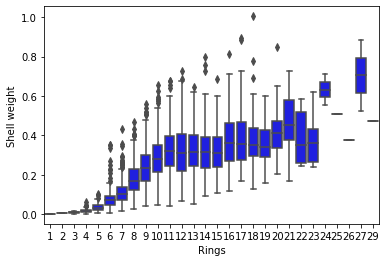

In [62]:
sns.boxplot(data=df_abalone,x="Rings",y='Shell weight',color='blue',orient='v')

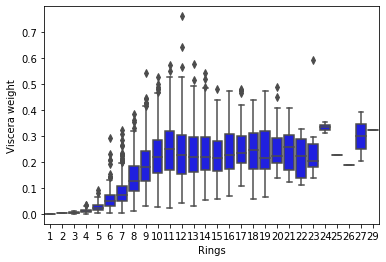

In [63]:
sns.boxplot(data=df_abalone,x="Rings",y='Viscera weight',color='blue',orient='v')

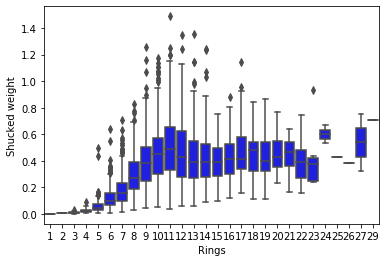

In [64]:
sns.boxplot(data=df_abalone,x="Rings",y='Shucked weight',color='blue',orient='v')

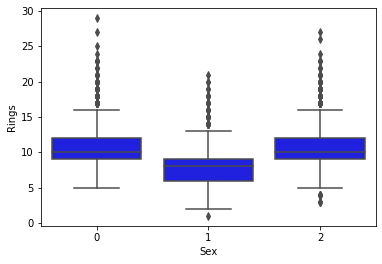

In [65]:
from sklearn.preprocessing import LabelEncoder
le_abalone = LabelEncoder()                                                     

df_abalone['Sex'] = le_abalone.fit_transform(df_abalone['Sex'])           #Label Encoding for transforming the labels

df_abalone['Sex'].value_counts()
sns.boxplot(data=df_abalone,y="Rings",x='Sex',color='blue',orient='v')

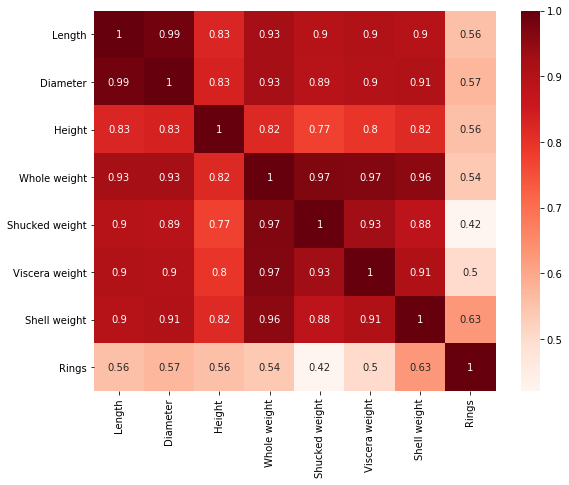

In [66]:
plt.figure(figsize=(9,7))
sns.heatmap(df_abalone_cor,cmap='Reds',annot=True)

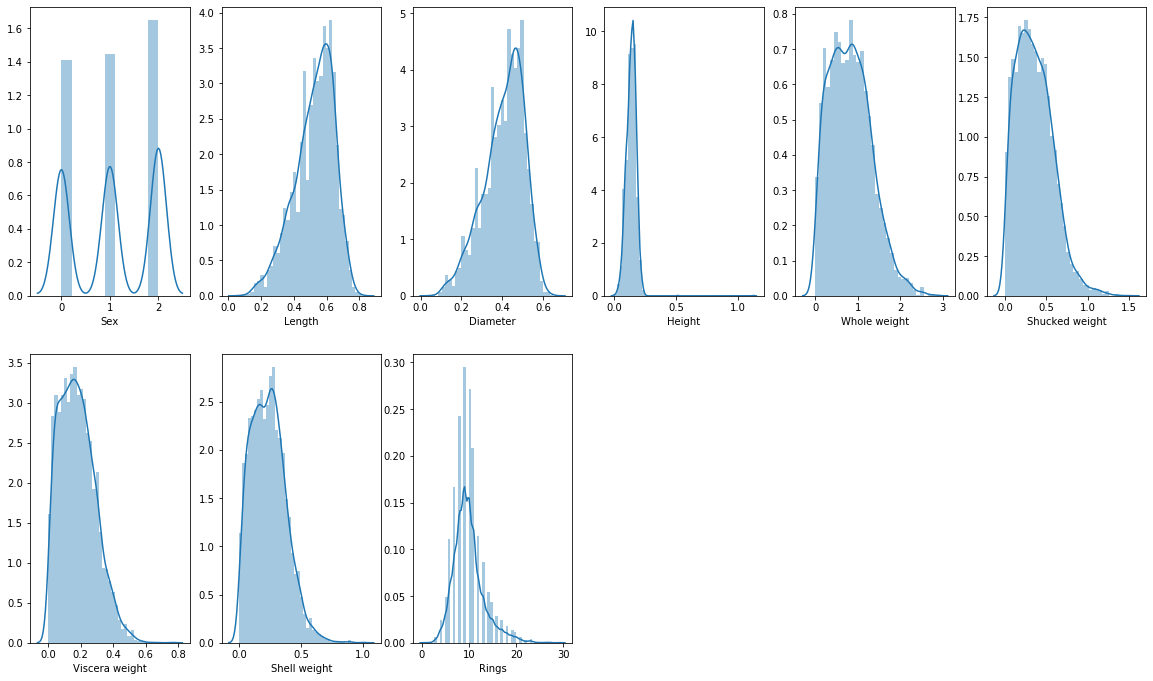

In [67]:
col_list=df_abalone.columns.values
plt.figure(figsize=(20,50))
for i in range(0, len(col_list)):                                       #Distplot is used To check the skewness
    plt.subplot(8,6,i+1)
    sns.distplot(df_abalone[col_list[i]])

In [68]:
from scipy.stats import zscore
z_score=abs(zscore(df_abalone))
print(df_abalone.shape)
df_abalone_final=df_abalone.loc[(z_score<3).all(axis=1)]                  
print(df_abalone_final.shape)
#to quantify the outliers

(4177, 9)
(4027, 9)


In [69]:
df_abalone=df_abalone[(z_score<3).all(axis=1)]  
#to remove the outliers

In [70]:
df_abalone.shape

(4027, 9)

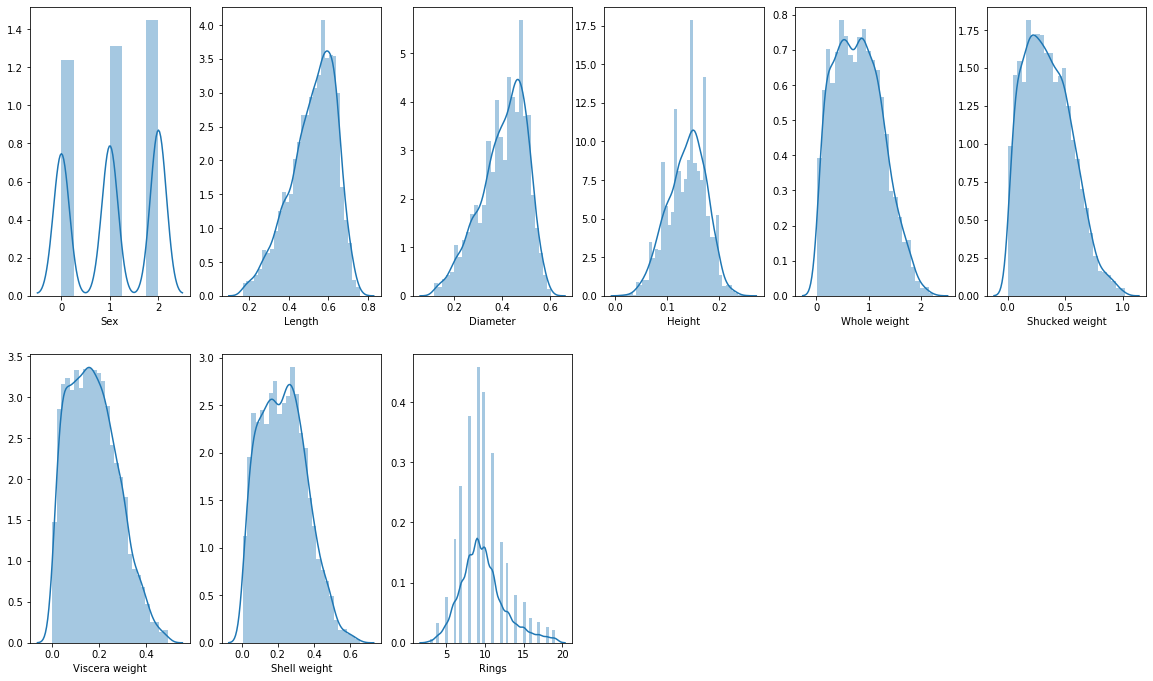

In [71]:
plt.figure(figsize=(20,50))
for i in range(0, len(col_list)):                                       #Distplot is used To check the skewness
    plt.subplot(8,6,i+1)
    sns.distplot(df_abalone[col_list[i]])

In [72]:
df_abalone['Rings'].unique()

array([15,  7,  9, 10,  8, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 17,  3],
      dtype=int64)

In [73]:
df_abalone['Rings'].value_counts()

9     686
10    625
8     566
11    472
7     391
6     258
12    251
13    199
14    119
5     113
15    102
16     62
17     53
4      49
18     39
19     32
3      10
Name: Rings, dtype: int64

In [74]:
x = df_abalone.iloc[:,:8]
y = df_abalone['Rings']
#Spliting the data

In [75]:
x.shape

(4027, 8)

In [76]:
y.shape

(4027,)

In [77]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [78]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42  is:  0.5105823631769737
r2 score corresponding to random state:  43  is:  0.5031065644156243
r2 score corresponding to random state:  44  is:  0.5100127968759378
r2 score corresponding to random state:  45  is:  0.559388072893415
r2 score corresponding to random state:  46  is:  0.5069244346455182
r2 score corresponding to random state:  47  is:  0.5150838328795483
r2 score corresponding to random state:  48  is:  0.4924663188587064
r2 score corresponding to random state:  49  is:  0.5325259143498233
r2 score corresponding to random state:  50  is:  0.5237614097367855
r2 score corresponding to random state:  51  is:  0.539005204333127
r2 score corresponding to random state:  52  is:  0.5034111505853802
r2 score corresponding to random state:  53  is:  0.42220724440131285
r2 score corresponding to random state:  54  is:  0.48248801915334405
r2 score corresponding to random state:  55  is:  0.5282825022696996
r2 score corresponding to random s

In [79]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))

0.19851116625310175
0.26054590570719605
0.22208436724565755
0.24193548387096775


In [80]:
#Lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.41480204014861294

In [81]:
#since maximum r2 score is coming around random state 62, we will use that to create our first model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [82]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.5237614097367855
RMSE is:  1.9675115119995752


In [83]:
df_abalone_pred=pd.DataFrame(y_pred)                #To save the prediction in csv
df_abalone_pred.to_csv("Project3_Prediction.csv")